In [1]:
from sklearn import datasets
X,y=datasets.make_blobs(n_samples=200,centers=[[5,5],[10,10]],cluster_std=1.5);

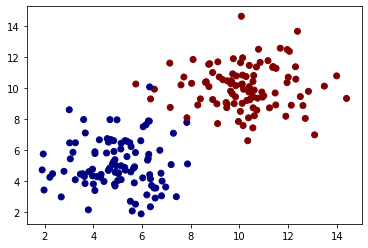

In [2]:
import numpy as np
import matplotlib.pyplot as plt
X=np.array(X);
a,b=X.T;
plt.scatter(a,b,c=y,cmap='jet')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)
import torch
X_train=torch.from_numpy(X_train.astype(np.float32))
Y_train=torch.from_numpy(Y_train.astype(np.float32))
X_test=torch.from_numpy(X_test.astype(np.float32))
Y_test=torch.from_numpy(Y_test.astype(np.float32))
Y_train=Y_train.view(Y_train.shape[0],1)
Y_test=Y_test.view(Y_test.shape[0],1)

In [4]:
class NeuralNetworkModel(torch.nn.Module):
 def __init__(self):
   super(NeuralNetworkModel,self).__init__()
   self.layer1=torch.nn.Linear(2,5);
   self.layer2=torch.nn.Linear(5,5);
   self.layer3=torch.nn.Linear(5,1);
 def forward(self,x):
   y_hat=torch.sigmoid(self.layer1(x))
   y_hat=torch.sigmoid(self.layer2(y_hat))
   y_hat=torch.sigmoid(self.layer3(y_hat))
   return y_hat
 def func(self,x):
   t=torch.sigmoid(self.layer1(x))
   t=torch.sigmoid(self.layer2(t))
   t=self.layer3(t)
   return t;

In [5]:
def plotmodel():
  x_min, x_max = 0, 20
  y_min, y_max = 0, 20
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, 0.02))
  fig, ax = plt.subplots()
  Z = model(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float())
  Z = Z>0.5;
  Z = Z.reshape(xx.shape)
  ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)
  ax.scatter(X[:, 0], X[:, 1], c=y)

In [6]:
model=NeuralNetworkModel()
criterion=torch.nn.BCELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

In [7]:
number_of_epochs=12000
for epoch in range(number_of_epochs):
 y_prediction=model(X_train)
 loss=criterion(y_prediction,Y_train)
 loss.backward()
 optimizer.step()
 optimizer.zero_grad()
 if (epoch+1)%1000 == 0:
   print('epoch:', epoch+1,',loss=',loss.item())

epoch: 1000 ,loss= 0.6919350028038025
epoch: 2000 ,loss= 0.6886075735092163
epoch: 3000 ,loss= 0.684545636177063
epoch: 4000 ,loss= 0.6793051958084106
epoch: 5000 ,loss= 0.672843337059021
epoch: 6000 ,loss= 0.6643192768096924
epoch: 7000 ,loss= 0.6525648832321167
epoch: 8000 ,loss= 0.635705292224884
epoch: 9000 ,loss= 0.6106991767883301
epoch: 10000 ,loss= 0.572990357875824
epoch: 11000 ,loss= 0.5172311067581177
epoch: 12000 ,loss= 0.4421231150627136


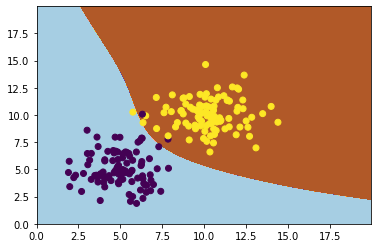

In [8]:
plotmodel()

In [12]:
x0_logit=torch.rand((1,2),requires_grad=True)
x0_activ=torch.rand((1,2),requires_grad=True)
x1_hist_logit=[]
x2_hist_logit=[]
x1_hist_activ=[]
x2_hist_activ=[]
x=[]
optimizer1=torch.optim.SGD([x0_logit],lr=0.1,momentum=0)
optimizer2=torch.optim.SGD([x0_activ],lr=0.1,momentum=0)
for i in range(10000):
      optimizer1.zero_grad();
      loss1=-model.func(x0_logit);
      loss1.backward();
      optimizer1.step();
      optimizer2.zero_grad();
      loss2=-model(x0_activ);
      loss2.backward();
      optimizer2.step();
      if(i%1000==0):
        u_logit=x0_logit[0].clone().detach().numpy();
        x1_hist_logit.append(u_logit[0])
        x2_hist_logit.append(u_logit[1])
        u_activ=x0_activ[0].clone().detach().numpy();
        x1_hist_activ.append(u_activ[0])
        x2_hist_activ.append(u_activ[1])

In [13]:
def model_plot1(model,X,y,title,x1_hist_logit,x2_hist_logit,x1_hist_activ,x2_hist_activ):  
    x_min, x_max = 0, 20
    y_min, y_max = 0, 20
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, 0.02))
    Z = model(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float())
    Z = Z>0.5;
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y,cmap='jet')
    plt.scatter(x1_hist_logit,x2_hist_logit,c='y',cmap='jet')
    plt.plot(x1_hist_logit,x2_hist_logit)
    plt.scatter(x1_hist_activ,x2_hist_activ,c='g',cmap='jet')
    plt.plot(x1_hist_activ,x2_hist_activ)
    plt.title(title)
    plt.show()

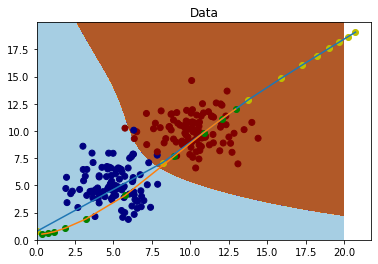

In [14]:
#yellow points use logit max and green points use activation
model_plot1(model,X,y,'Data',x1_hist_logit,x2_hist_logit,x1_hist_activ,x2_hist_activ)